## Create data

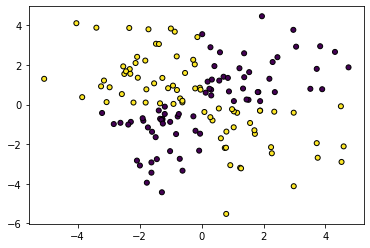

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
n = 150
X = np.random.RandomState(0).randn(n,2)
X = 1.99 * X + 0.001
X1 = X[:, 0] 
X2 = X[:, 1] 

Y = np.logical_xor(X1>0,X2>0)

plt.scatter(X1,X2,c=Y,s=25,edgecolors=(0, 0, 0))

## Design an SVM and calculate test accuracy 

##### Using Support Vector Classifier or Soft Margin Classifier

default kernel is rbf-> radial basis function

###### using k cross validation

#### First using sklearn function before feature expansion

In [2]:
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import statistics

kfold=5
skfolds = StratifiedKFold(n_splits=kfold)

accuracy = []

float_range_array = np.arange(0.5, 10, 0.5)
best_c = 0
best_c_score = 0
for train_index,test_index in skfolds.split(X,Y):
    X_train_folds = X[train_index]
    y_train_folds = Y[train_index]
    X_test_fold = X[test_index]
    y_test_fold = Y[test_index]
    for c in float_range_array:      
        clf = svm.SVC(kernel='linear',C=c)
        #clf = svm.LinearSVC(C=c,max_iter=20000)
        clf.fit(X_train_folds,y_train_folds)
        predict  = clf.predict(X_test_fold)
        a = metrics.accuracy_score(y_test_fold, predict)
        if a > best_c_score:
            best_c_score = a
            best_c =  c
        accuracy.append(a)

print("\nAvarage accuracy: ", statistics.mean(accuracy))
print("Best c value",best_c)
print("Best Accuracy: ", best_c_score)


Avarage accuracy:  0.6136842105263157
Best c value 0.5
Best Accuracy:  0.7


#### Prepare 3D data for non linear data

##### Making feature expansion

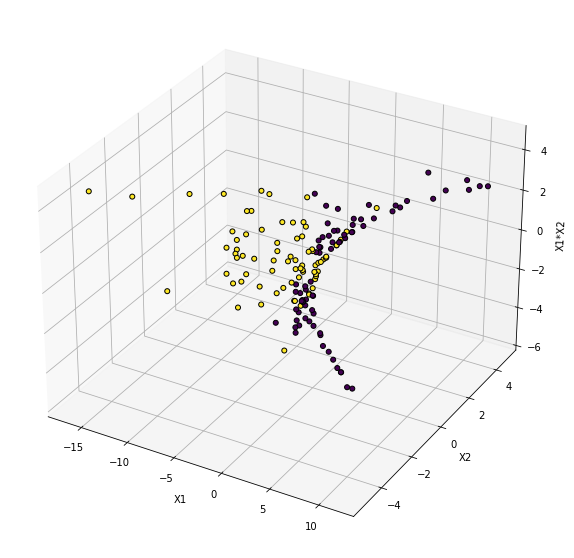

In [3]:
ax = plt.figure(figsize=(20, 10)).gca(projection='3d')
Z = (X1*X2)
Y = np.logical_xor(X1>0,X2>0)
ax.scatter(Z, X1, X2, c=Y,s=25,edgecolors=(0, 0, 0), alpha=1)
ax.set(xlabel='X1', ylabel='X2', zlabel='X1*X2')

plt.show()

#### using sklearn SVM

In [4]:
X_new = np.column_stack((X,Z.ravel()))
clf = svm.SVC()
clf.fit(X_new,Y)
predict  = clf.predict(X_new)
a = metrics.accuracy_score(Y, predict)
print(a)

0.9933333333333333


In [5]:
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import statistics

kfold=5
skfolds = StratifiedKFold(n_splits=kfold)

accuracy = []

float_range_array = np.arange(0.5, 15, 0.5)
best_c = 0
best_c_score = 0
for train_index,test_index in skfolds.split(X_new,Y):
    X_train_folds = X_new[train_index]
    y_train_folds = Y[train_index]
    X_test_fold = X_new[test_index]
    y_test_fold = Y[test_index]
    for c in float_range_array:      
        #clf = svm.SVC(kernel='linear',C=c)
        clf = svm.LinearSVC(C=c,max_iter=10000)
        clf.fit(X_train_folds,y_train_folds)
        predict  = clf.predict(X_test_fold)
        a = metrics.accuracy_score(y_test_fold, predict)
        if a > best_c_score:
            best_c_score = a
            best_c =  c
        accuracy.append(a)

print("\nAvarage accuracy: ", statistics.mean(accuracy))
print("Best c value",best_c)
print("Best Accuracy: ", best_c_score)


Avarage accuracy:  0.9857471264367816
Best c value 0.5
Best Accuracy:  1.0


### Model Selection and Show test performance

In [6]:
from sklearn.metrics import confusion_matrix

for train_index,test_index in skfolds.split(X_new,Y):
    X_train_folds = X_new[train_index]
    y_train_folds = Y[train_index]
    X_test_fold = X_new[test_index]
    y_test_fold = Y[test_index]      
    #clf = svm.SVC(kernel='linear',C=best_c)
    clf = svm.LinearSVC(C=best_c,max_iter=10000)
    clf.fit(X_train_folds,y_train_folds)
    predict  = clf.predict(X_test_fold)
    a = metrics.accuracy_score(y_test_fold, predict)
    accuracy.append(a)
    print("Accuracy",a)
    con = confusion_matrix(y_test_fold,predict)
    print("Confusion matrix:\n",con,"\n")
print("\nAvarage accuracy: ", statistics.mean(accuracy))

Accuracy 1.0
Confusion matrix:
 [[15  0]
 [ 0 15]] 

Accuracy 0.9666666666666667
Confusion matrix:
 [[14  1]
 [ 0 15]] 

Accuracy 1.0
Confusion matrix:
 [[15  0]
 [ 0 15]] 

Accuracy 0.9333333333333333
Confusion matrix:
 [[13  2]
 [ 0 15]] 

Accuracy 1.0
Confusion matrix:
 [[14  0]
 [ 0 16]] 


Avarage accuracy:  0.9855555555555555
